# Selección de Variables y balanceo de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

## 1. Balanceo de datos
Referencia: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

¿Qué tienen en común los conjuntos de datos en situaciones como la detección de fraude en la banca, las ofertas en tiempo real en marketing o la detección de intrusiones en las redes?

Los datos utilizados en estas áreas a menudo tienen menos del 1% de eventos raros, pero "interesantes" (por ejemplo, estafadores que usan tarjetas de crédito, usuarios que hacen clic en publicidad o servidores corruptos que escanean su red). 
Sin embargo, la mayoría de los algoritmos de aprendizaje automático no funcionan muy bien con conjuntos de datos desequilibrados.

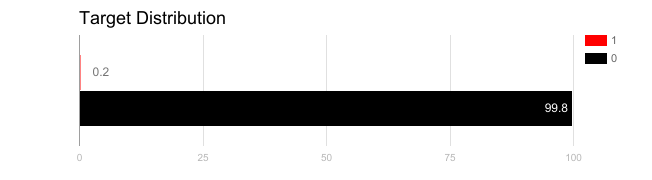

**...!usa las métricas de evaluación correctas !...**
 
La aplicación de métricas de evaluación inapropiadas para el modelo ,utilizando datos desbalanceados, puede ser peligroso.
Imagine que nuestros datos de entrenamiento son los que se ilustran en el gráfico anterior. Si se usa la precisión para medir la bondad de un modelo, un modelo que clasifique todas las muestras de prueba en "0" tendrá una precisión excelente (99,8%), pero obviamente este modelo no proporcionará ninguna información valiosa para nosotros.

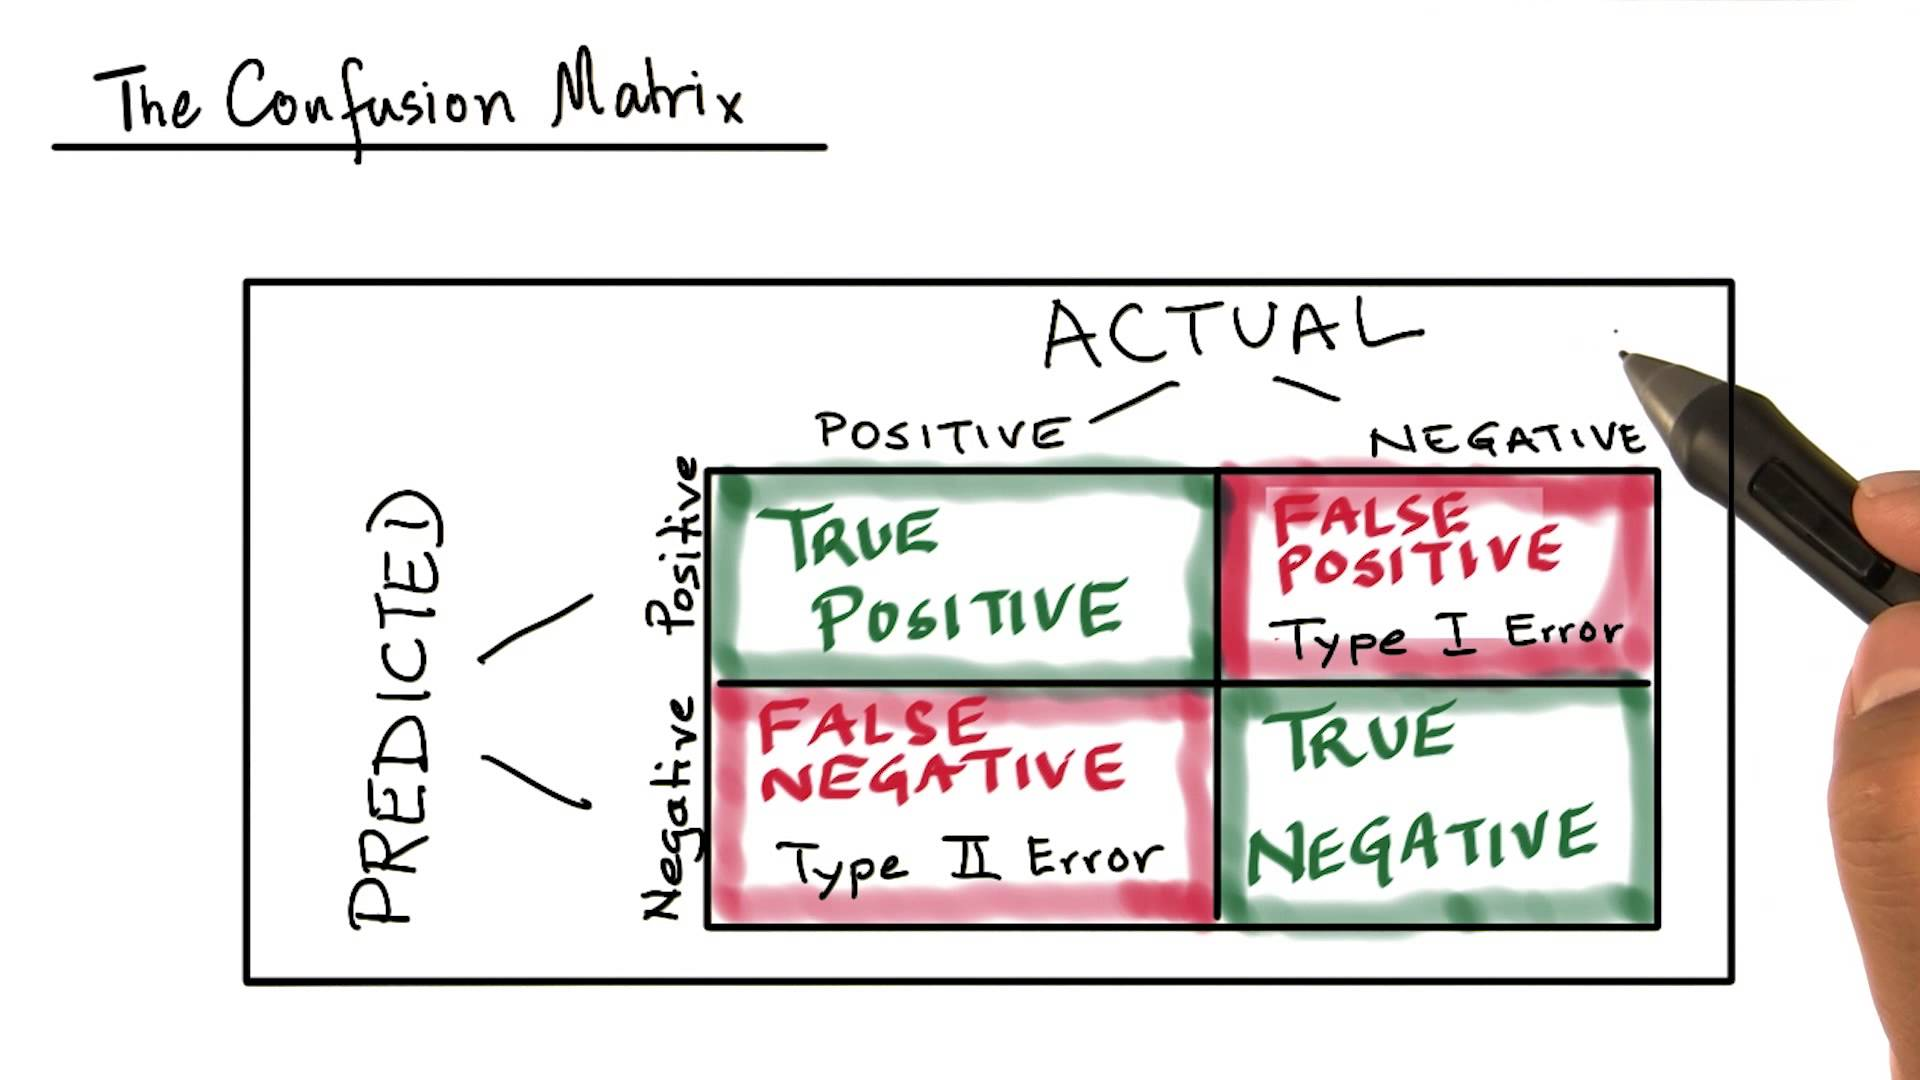

En este caso, se pueden aplicar otras medidas de evaluación alternativas como:

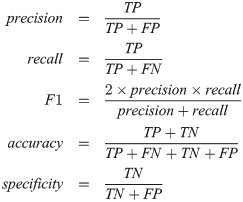

Precisión / especificidad: cuántas instancias seleccionadas son relevantes.
Recall / Sensitivity: cuántas instancias relevantes se seleccionan.
Puntuación F1: media armónica de precisión y recuperación.
MCC: coeficiente de correlación entre las clasificaciones binarias observadas y predichas.
AUC: relación entre la tasa de verdadero positivo y la tasa de falso positivo.

In [2]:
df_train_clientes = pd.read_excel('../data/train_clientes.xlsx')

In [7]:
df_train_clientes.columns

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'ATTRITION',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CAN

### Veamos la distribución del Target

In [8]:
df_train_clientes.groupby("ATTRITION").agg('size')/len(df_train_clientes)

ATTRITION
0    0.8454
1    0.1546
dtype: float64

In [9]:
df_train_clientes.groupby("ATTRITION").agg('size')

ATTRITION
0    59178
1    10822
dtype: int64

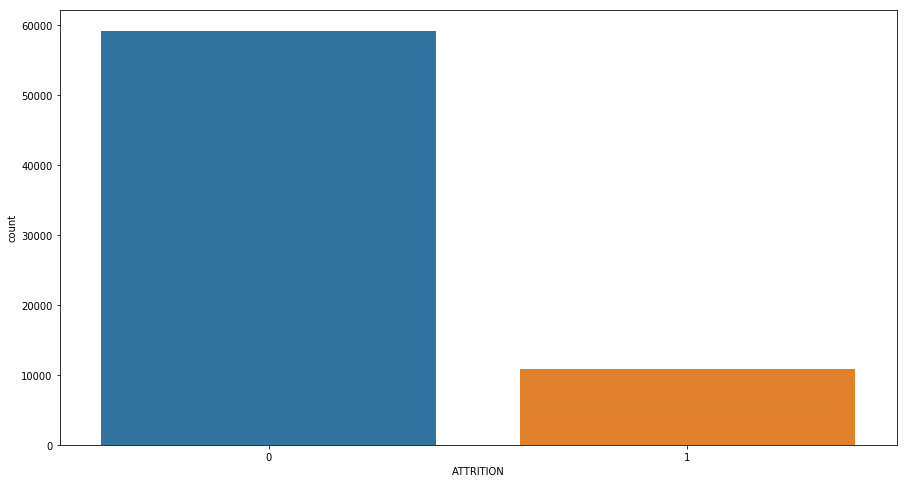

In [10]:
# Grafiquemos la distribución del traget
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.countplot(x="ATTRITION", data=df_train_clientes)

#### ** se muestra desbalance de las clases del target, hay sesgo para el entrenamiento de algoritmos

## 2. Técnicas de balanceo de datos
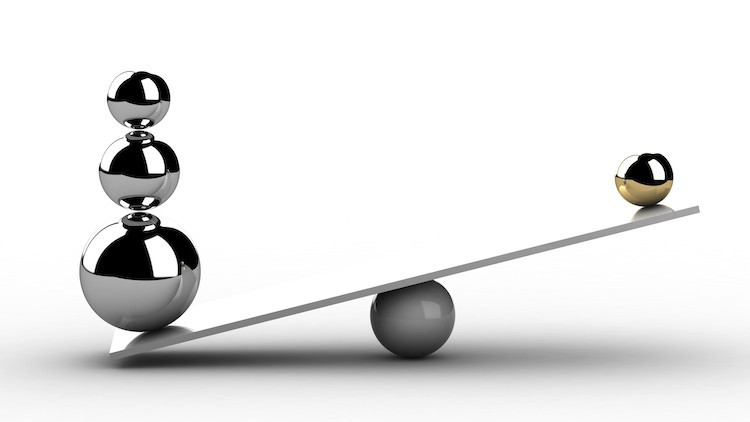

### 2.1 Under - sampling

El submuestreo equilibra el conjunto de datos al **reducir el tamaño de la clase abundante**. Este método se usa cuando la cantidad de datos es suficiente. Al mantener todas las muestras en la clase objetivo y selecciona aleatoriamente un número igual de muestras en la clase abundante, se puede recuperar un nuevo conjunto de datos equilibrado para seguir modelando.

In [11]:
t = df_train_clientes[["ATTRITION"]]
n_samples = t.shape[0]
n_samples_0 = (t == 0).sum()
n_samples_1 = (t == 1).sum()
n_samples_1

ATTRITION    10822
dtype: int64

In [14]:
0.50  --- [0.51, 0.52,...]
0.01  --- [x1, x2,...]

TypeError: bad operand type for unary -: 'list'

In [13]:
# En nuetro caso, la clase minoritaria sea 1 ( ATTRITION)

## variable target = t
t = df_train_clientes[["ATTRITION"]]
n_samples = t.shape[0]
n_samples_0 = (t == 0).sum()
n_samples_1 = (t == 1).sum()

## si se quiere que la clase minoritaria sea el 50% del total
target_percentage = 0.5

## formula para hallar la cantidad de nuevos registros (de la clase minoritaria) para el oversampling
n_samples_1_new =  n_samples_1/target_percentage - n_samples_1#-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1

 
dataset_oversampled = pd.concat( [df_train_clientes.loc[df_train_clientes["ATTRITION"]== 0].sample(n = int(n_samples_1_new), replace=True, random_state = 10) , 
                                  df_train_clientes.loc[df_train_clientes["ATTRITION"]== 1] ])
# reseteamos indices para evitar errores
dataset_oversampled.reset_index(drop=True, inplace=True)

In [15]:
dataset_oversampled.groupby("ATTRITION").agg('size')

ATTRITION
0    10822
1    10822
dtype: int64

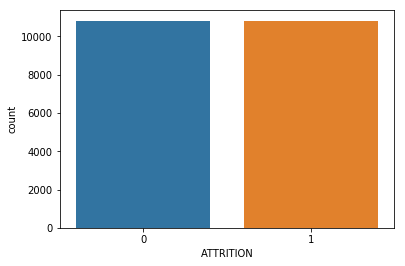

In [16]:
sns.countplot(x="ATTRITION", data=dataset_oversampled)

### 2.2 Over - sampling

Por el contrario, el sobremuestreo se usa cuando la cantidad de datos es insuficiente. Intenta equilibrar el conjunto de datos aumentando el tamaño de las muestras objetivo.

In [ ]:
#!pip install -U imbalanced-learn

In [17]:
X

NameError: name 'X' is not defined

In [20]:
X_resampled

array([[-0.15078987,  1.89529141,  2.01233518, ...,  1.6865177 ,
         1.43816055, -1.63157976],
       [ 0.56412561,  1.27775475,  1.61999199, ...,  0.26385655,
         1.01872622, -1.36971764],
       [ 0.02502945,  3.51498677,  3.04050308, ...,  0.87117519,
         2.061301  , -3.0315291 ],
       ...,
       [ 0.96966997, -0.98680472,  0.6009766 , ..., -1.51773417,
        -1.80469993, -2.88159982],
       [-0.02622614, -2.83974231,  2.37019087, ...,  1.2113091 ,
        -0.60741651, -2.26016693],
       [-0.30199042, -2.62827968,  2.380694  , ..., -1.01590316,
        -0.41288607, -2.11211688]])

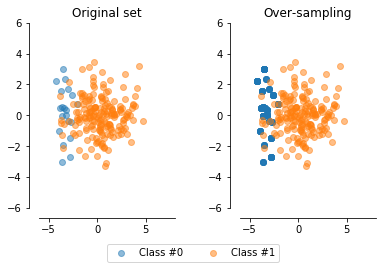

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler

# Generamos un dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Creamos un objeto con dos componentes principales (PCA) para facilitar la visualización
pca = PCA(n_components=2) # instanciamos los dos componentes
X_vis = pca.fit_transform(X)

# Aplicamos Over-sampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Partimos la imagen en dos secciones para plotear
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],label="Class #1", alpha=.5)
ax2.set_title('Over-sampling')

# Generamos el ploteo
for ax in (ax1, ax2):    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10)) # exterior del gráfico
    ax.spines['bottom'].set_position(('outward', 10)) # exterior del gráfico
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])
    
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# Nuestro primer modelo

Referencia: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [18]:
# Seleccionamos las variables con las que vamos a modelar
columns_exc = list(df_train_clientes.select_dtypes(include='object').columns)
columns_exc.append('ID_CORRELATIVO')
columns_exc.append('CODMES')

In [19]:
df_final = df_train_clientes.drop(columns=columns_exc)
df_final = df_final.dropna()

In [20]:
df_final_vars = df_final.columns.values.tolist()
y = ['ATTRITION']
X = [i for i in df_final_vars if i not in y]

### Selección de variables con REF (Recursive Feature Elimination)

Dado un estimador externo que asigna ponderaciones a las características (p. Ej., Los coeficientes de un modelo lineal), el objetivo de la eliminación recursiva de características (RFE) es seleccionar las características considerando recursivamente conjuntos de características cada vez más pequeños. Primero, el estimador está entrenado en el conjunto inicial de características y la importancia de cada característica se obtiene a través de un coef_atributo o mediante un feature_importances_atributo. Entonces, las características menos importantes se eliminan del conjunto actual de características. Ese procedimiento se repite recursivamente en el conjunto podado hasta que finalmente se alcanza el número deseado de características para seleccionar.

In [21]:
# Utilizamos las 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10) # aplicamos la regresión logística como estimador y pedimos las 10 mejores variables
rfe = rfe.fit(df_final[X], df_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\mmejia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True False False False False False False False False False  True  True
  True  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True False False  True]
[ 1 20  5 36 32 35 37 33 34 29  1  1  1  1 19  1  7 16 22  4 11 28 14 31
 21 17 18 26 23 13 15 12 24 30  3  9 10 27  2  6  1  1  1  8 25  1]


In [22]:
X = df_final.iloc[:,rfe.support_] # seleccionamos las top 18 variables
y = df_final['ATTRITION']

### Implementamos el modelo

In [23]:
#pip install statsmodels
#pip install patsy
import statsmodels.api as sm

In [24]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.394689
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              ATTRITION   No. Observations:                63068
Model:                          Logit   Df Residuals:                    63058
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 Nov 2018   Pseudo R-squ.:                -0.01933
Time:                        12:25:36   Log-Likelihood:                -24892.
converged:                       True   LL-Null:                       -24420.
                                        LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
FLG_BANCARIZADO          -1.2215      0.022    -55.440      0.000      -1.265      -1.

### Ajuste del modelo

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16445     0]
 [ 2476     0]]


### Curva ROC

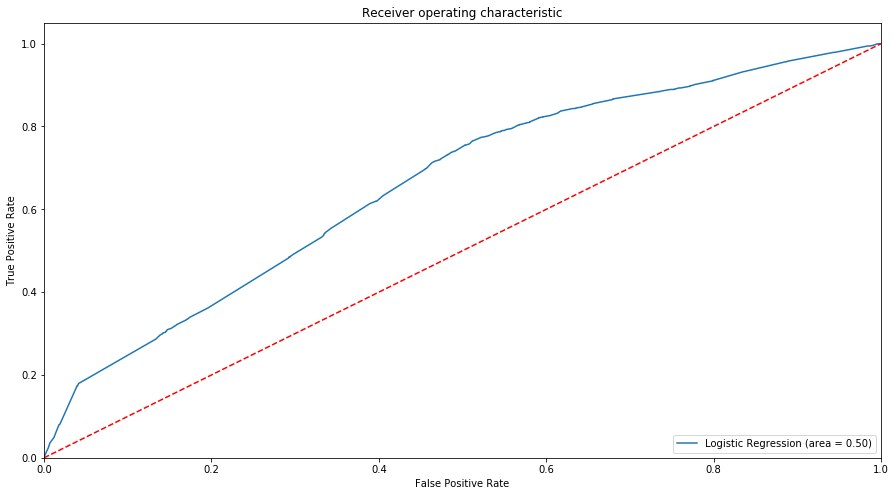

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
#plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()